# Project: Topic Modeling and Sentiment Analysis on Twitter Data

## **Objective **
### Social Media Tweet Analysis on Twitter Dataset
*   Topic Modeling on Twitter Dataset
*   Sentiment analysis on Twitter Dataset

### **Topic modeling**
Topic modeling is a type of statistical model for discovering the abstract "topics" that occur in a collection of texts.


*   The task here is to discover abstract topics from tweets.


### **Sentiment analysis**
 It is used in social media monitoring, allowing businesses to gain insights about how customers feel about certain topics, and detect urgent issues in real time before they spiral out of control.


*   The task here is to classify a tweet as a positive or negative tweet sentiment wise.

## Data Understanding
### Loading necessary packages

In [20]:
import json
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import STOPWORDS,WordCloud
from gensim import corpora
import pandas as pd
import string
import re
from textblob import TextBlob

In [21]:
def read_json(json_file: str)->list:
    """
    json file reader to open and read json files into a list
    Args:
    -----
    json_file: str - path of a json file
    
    Returns
    -------
    length of the json file and a list of json
    """
    
    tweets_data = []
    for tweets in open(json_file,'r'):
        tweets_data.append(json.loads(tweets))
    
    return len(tweets_data), tweets_data


In [22]:
class TweetDfExtractor:
    """
    this function will parse tweets json into a pandas dataframe
    
    Return
    #------
    dataframe
    """
    def __init__(self, tweets_list):
        
        self.tweets_list = tweets_list

    # an example function
    def find_statuses_count(self)->list:
        statuses_count = []
        for element in self.tweets_list:
            try:
                if 'user' in element:
                    statuses_count.append(element['user']['statuses_count'])

                else:
                    statuses_count.append(element['retweeted_status']['user']['statuses_count'])

            except Exception as e:
#                 print(e)
                statuses_count.append(None)

        return statuses_count
        
    def find_full_text(self)->list:
        text = []
        for element in self.tweets_list:
            if 'retweeted_status' in element:
                try:
                    if 'extended_tweet' in element['retweeted_status']:
                        text.append(element['retweeted_status']['extended_tweet']['full_text'])
                    else:
                        text.append(element['retweeted_status']['text'])
                except Exception as e:
#                     print(e)
                    pass

            else:
                try:
                    if 'extended_tweet' in element['quoted_status']:
                        text.append(element['quoted_status']['extended_tweet']['full_text'])
                    else:
                        text.append(element['quoted_status']['text'])
                except Exception as e:
#                     print(e)
                    if 'text' in element:
                        text.append(element['text'])
                    else:
                        text.append(None)

        return text
    
    def find_sentiments(self, text)->list:
        polarity, subjectivity, sentiment = [], [], []
        tetx = ""
        for element in self.tweets_list:
            if 'retweeted_status' in element:
                try:
                    if 'extended_tweet' in element['retweeted_status']:
                        text = element['retweeted_status']['extended_tweet']['full_text']
                    else:
                        text = element['retweeted_status']['text']
                except Exception as e:
#                     print(e)
                    pass
            else:
                try:
                    if 'extended_tweet' in element['quoted_status']:
                        text = element['quoted_status']['extended_tweet']['full_text']
                    else:
                        text = element['quoted_status']['text']
                except:
                    # print(e)
                    text = element['text']
            polarity1 = TextBlob(text).polarity
            subjectivity1 = TextBlob(text).subjectivity
            polarity.append(polarity1)
            subjectivity.append(subjectivity1)

        return polarity, subjectivity

    def find_sentiment_two(self, text)->list:
        sentiment = []
        tetx = ""
        for element in self.tweets_list:
            if 'retweeted_status' in element:
                try:
                    if 'extended_tweet' in element['retweeted_status']:
                        text = element['retweeted_status']['extended_tweet']['full_text']
                    else:
                        text = element['retweeted_status']['text']
                except Exception as e:
#                     print(e)
                    pass
            else:
                try:
                    if 'extended_tweet' in element['quoted_status']:
                        text = element['quoted_status']['extended_tweet']['full_text']
                    else:
                        text = element['quoted_status']['text']
                except:
                    # print(e)
                    text = element['text']
            sentiment1 = TextBlob(text).sentiment
#             sentiment.append("Sentiment(polarity="+str(polarity1)+", subjectivity="+str(subjectivity1))
            sentiment.append(sentiment1)

        return sentiment

    def find_created_time(self)->list:
        created_at = []  # Initialize empty list
        for element in self.tweets_list:
            try:
                if 'created_at' in element:
                    created_at.append(element['created_at'])

                else:
                    created_at.append(element['retweeted_status']['created_at'])
            except Exception as e:
#                 print(e)
                created_at.append(None)

        return created_at

    def find_source(self)->list:
        source = []
        for element in self.tweets_list:
            try:
                if 'source' in element:
                    source.append(element['source'])

                else:
                    source.append(element['retweeted_status']['source'])
            except Exception as e:
#                 print(e)
                source.append(None)
                
        return source

    def find_screen_name(self)->list:
        screen_name = []
        for element in self.tweets_list:
            try:
                if 'user' in element:
                    screen_name.append(element['user']['screen_name'])

                else:
                    screen_name.append(element['retweeted_status']['user']['screen_name'])

            except Exception as e:
#                 print(e)
                screen_name.append(None)

        return screen_name

    def find_followers_count(self)->list:
        followers_count = []
        for element in self.tweets_list:
            try:
                if 'user' in element:
                    followers_count.append(element['user']['followers_count'])

                else:
                    followers_count.append(element['retweeted_status']['user']['followers_count'])

            except Exception as e:
#                 print(e)
                followers_count.append(None)

        return followers_count

    def find_friends_count(self)->list:
        friends_count = []
        for element in self.tweets_list:
            try:
                if 'user' in element:
                    friends_count.append(element['user']['friends_count'])

                else:
                    friends_count.append(element['retweeted_status']['user']['friends_count'])

            except Exception as e:
#                 print(e)
                friends_count.append(None)
        return  friends_count


    def is_sensitive(self)->list:
        is_sensitive = []
        for element in self.tweets_list:
            # try:
            if 'retweeted_status' in element:
                try:
                    is_sensitive.append(element['retweeted_status']['possibly_sensitive'])
                except Exception as e:
#                     print(e)
                    pass

            else:
                is_sensit = None
                is_sensitive.append(is_sensit)

        return is_sensitive

    def find_favourite_count(self)->list:
        favourite_count = []
        for element in self.tweets_list:
            try:
                if 'retweeted_status' in element:
                    favourite_count.append(element['retweeted_status']['favorite_count'])

                else:
                    favourite_count.append(element['favorite_count'])

            except Exception as e:
#                 print(e)
                favourite_count.append(None)

        return favourite_count
    
    def find_retweet_count(self)->list:
        retweet_count = []
        for element in self.tweets_list:
            try:
                if 'retweeted_status' in element:
                    retweet_count.append(element['retweeted_status']['retweet_count'])

                else:
                    retweet_count.append(element['retweet_count'])

            except Exception as e:
#                 print(e)
                pass

        return retweet_count

    def find_hashtags(self)->list:
        hashtags =[]
        text = self.find_full_text()
        for element in text:
            try:
                hashtags.append(re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', element))
            except Exception as e:
#                 print(e)
                hash = None
                hashtags.append(hash)

        return hashtags

    def find_lang(self)->list:
        lang = []
        for element in self.tweets_list:
            try:
                if 'lang' in element:
                    lang.append(element['lang'])

                else:
                    language = None
                    lang.append(language)
            except Exception as e:
#                 print(e)
                lang.append(None)

        return lang

    def find_mentions(self)->list:
        mentions = []
        for element in self.tweets_list:
            try:
                if 'retweeted_status' in element:
                    if 'extended_tweet' in element['retweeted_status']:
                        mentions.append(element['retweeted_status']['extended_tweet']['entities']['user_mentions'][0])
                    else:
                        mentions.append(element['retweeted_status']['entities']['user_mentions'][0])
                else:
                    mentions.append(element['entities']['user_mentions'][0])

            except Exception as e:
#                 print(e)
                mention = None
                mentions.append(mention)

        return mentions


    def find_location(self)->list:
        location = []
        for element in self.tweets_list:
            try:
                location1 = element['user']['location']
                location.append(location1)
            except TypeError:
                location1 = None
                location.append(location1)
        
        return location

    
        
        
    def get_tweet_df(self, save=False)->pd.DataFrame:
        """required column to be generated you should be creative and add more features"""
        
        columns = ['created_at', 'source', 'original_text','lang', 'sentiment','favorite_count', 'retweet_count','polarity', 'subjectivity',
            'original_author', 'followers_count','friends_count','possibly_sensitive', 'hashtags', 'user_mentions', 'place']
        
        created_at = self.find_created_time()
        # print(created_at)
        source = self.find_source()
        text = self.find_full_text()
        polarity, subjectivity = self.find_sentiments(text)
        sentiment = self.find_sentiment_two(text)
        lang = self.find_lang()
        fav_count = self.find_favourite_count()
        retweet_count = self.find_retweet_count()
        screen_name = self.find_screen_name()
        follower_count = self.find_followers_count()
        friends_count = self.find_friends_count()
        sensitivity = self.is_sensitive()
        hashtags = self.find_hashtags()
        mentions = self.find_mentions()
        location = self.find_location()
        print(">",len(polarity), len(subjectivity),len(sentiment))
        print(len(created_at),"-",len(source),"-",len(text),"-",len(lang),"-",len(fav_count),
              "-",len(retweet_count),"-",len(screen_name),"-",len(follower_count),
              "-",len(friends_count),"-",len(sensitivity),"-",len(hashtags),"-",len(mentions),"-",len(location) )
        data = zip(created_at, source, text, lang, sentiment, fav_count, retweet_count, polarity, subjectivity,  screen_name, follower_count, friends_count, sensitivity, hashtags, mentions, location)
        df = pd.DataFrame(data=data, columns=columns)

        if True:
            try:
                df.to_csv('processed_tweet_data.csv', index=False)
                print('Data prepared and Saved in processed_tweet_data.csv File Successfully!!!')
            except Exception as e:
                print("File save Failed!", e)
        return df

                
if __name__ == "__main__":
    # required column to be generated you should be creative and add more features
    columns = ['created_at', 'source', 'original_text','clean_text', 'sentiment','polarity','subjectivity', 'lang', 'favorite_count', 'retweet_count', 
    'original_author', 'screen_count', 'followers_count','friends_count','possibly_sensitive', 'hashtags', 'user_mentions', 'place', 'place_coord_boundaries']
    
    tweets_length, tweet_list = read_json("data/covid19.json")
    tweet = TweetDfExtractor(tweet_list)
    tweet_df = tweet.get_tweet_df()

# use all defined functions to generate a dataframe with the specified columns above

> 6532 6532 6532
6532 - 6532 - 6532 - 6532 - 6532 - 6532 - 6532 - 6532 - 6532 - 5365 - 6532 - 6532 - 6532
Data prepared and Saved in processed_tweet_data.csv File Successfully!!!


In [23]:
tweet_df.head()

,created_at,source,original_text,lang,sentiment,favorite_count,retweet_count,polarity,subjectivity,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
0,Fri Jun 18 17:55:49 +0000 2021,"<a href=""http://twitter.com/download/iphone"" r...","🚨Africa is ""in the midst of a full-blown third...",en,"(0.16666666666666666, 0.18888888888888888)",548,612,0.166667,0.188889,ketuesriche,551,351,False,[],"{'screen_name': 'WHOAFRO', 'name': 'WHO Africa...",Mass
1,Fri Jun 18 17:55:59 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...","Dr Moeti is head of WHO in Africa, and one of ...",en,"(0.13333333333333333, 0.45555555555555555)",195,92,0.133333,0.455556,Grid1949,66,92,False,[],None,"Edinburgh, Scotland"
2,Fri Jun 18 17:56:07 +0000 2021,"<a href=""http://twitter.com/download/iphone"" r...",Thank you @research2note for creating this ama...,en,"(0.3166666666666667, 0.48333333333333334)",2,1,0.316667,0.483333,LeeTomlinson8,1195,1176,False,[#red4research],"{'screen_name': 'Research2note', 'name': 'Rese...",None
3,Fri Jun 18 17:56:10 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...","Former Pfizer VP and Virologist, Dr. Michael Y...",en,"(0.08611111111111111, 0.19722222222222224)",1580,899,0.086111,0.197222,RIPNY08,2666,2704,False,[#Covid19],None,None
4,Fri Jun 18 17:56:20 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",I think it’s important that we don’t sell COVA...,en,"(0.27999999999999997, 0.6199999999999999)",72,20,0.280000,0.620000,pash22,28250,30819,False,[],"{'screen_name': 'TexasChildrens', 'name': 'Tex...",United Kingdom


In [24]:
#To get information abou the data
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5365 entries, 0 to 5364
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   created_at          5365 non-null   object 
 1   source              5365 non-null   object 
 2   original_text       5365 non-null   object 
 3   lang                5365 non-null   object 
 4   sentiment           5365 non-null   object 
 5   favorite_count      5365 non-null   int64  
 6   retweet_count       5365 non-null   int64  
 7   polarity            5365 non-null   float64
 8   subjectivity        5365 non-null   float64
 9   original_author     5365 non-null   object 
 10  followers_count     5365 non-null   int64  
 11  friends_count       5365 non-null   int64  
 12  possibly_sensitive  3618 non-null   object 
 13  hashtags            5365 non-null   object 
 14  user_mentions       1349 non-null   object 
 15  place               3354 non-null   object 
dtypes: flo

In [25]:
# Dropping Non-english texts
indices = tweet_df.loc[tweet_df['lang']!='en'].index
tweet_df.drop(indices, inplace=True)
tweet_df=tweet_df.reset_index(drop=True)
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5365 entries, 0 to 5364
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   created_at          5365 non-null   object 
 1   source              5365 non-null   object 
 2   original_text       5365 non-null   object 
 3   lang                5365 non-null   object 
 4   sentiment           5365 non-null   object 
 5   favorite_count      5365 non-null   int64  
 6   retweet_count       5365 non-null   int64  
 7   polarity            5365 non-null   float64
 8   subjectivity        5365 non-null   float64
 9   original_author     5365 non-null   object 
 10  followers_count     5365 non-null   int64  
 11  friends_count       5365 non-null   int64  
 12  possibly_sensitive  3618 non-null   object 
 13  hashtags            5365 non-null   object 
 14  user_mentions       1349 non-null   object 
 15  place               3354 non-null   object 
dtypes: flo

In [26]:
# Removing Duplicates


In [27]:
# Determining None values in data

print("The number of missing value(s): {}".format(tweet_df.isnull().sum().sum()))
print("Columns having columns value:{}".format(tweet_df.columns[tweet_df.isnull().any()]))

The number of missing value(s): 7774
Columns having columns value:Index(['possibly_sensitive', 'user_mentions', 'place'], dtype='object')


In [28]:
class CleanedTextProcessing:
  def __init__(self,df):
    self.df=df
    
  def preprocess_cleaned_text(self):
    
    #text Preprocessing
    tweet_df['cleaned_text']=tweet_df['original_text'].astype(str)
    tweet_df['cleaned_text'] = tweet_df['original_text'].apply(lambda x: x.lower())
    tweet_df['cleaned_text']= tweet_df['original_text'].apply(lambda x: x.translate(str.maketrans(' ', ' ', string.punctuation)))
    
    #Converting tweets to list of words For feature engineering
    sentence_list = [tweet for tweet in tweet_df['cleaned_text']]
    word_list = [sent.split() for sent in sentence_list]

    #Create dictionary which contains Id and word 
    word_to_id = corpora.Dictionary(word_list)
    corpus_1= [word_to_id.doc2bow(tweet) for tweet in word_list]



    
    return tweet_df, word_list, word_to_id, corpus_1


In [29]:
PrepareData_obj=CleanedTextProcessing(tweet_df)
tweet_df, word_list ,id2word,corpus=PrepareData_obj.preprocess_cleaned_text()

[['🚨Africa', 'is', 'in', 'the', 'midst', 'of', 'a', 'fullblown', 'third', 'wave', 'of', 'coronavirus', 'the', 'head', 'of', 'WHOAFRO', 'has', 'warned', 'Cases', 'have', 'risen', 'across', 'the', 'continent', 'by', 'more', 'than', '20', 'and', 'deaths', 'have', 'also', 'risen', 'by', '15', 'in', 'the', 'last', 'week', 'jriggers', 'reports', '🧵', 'httpstcoCRDhqPHFWM'], ['Dr', 'Moeti', 'is', 'head', 'of', 'WHO', 'in', 'Africa', 'and', 'one', 'of', 'the', 'best', 'public', 'health', 'experts', 'and', 'leaders', 'I', 'know', 'Hers', 'is', 'a', 'desperate', 'request', 'for', 'vaccines', 'to', 'Africa', 'We', 'plead', 'with', 'Germany', 'and', 'the', 'UK', 'to', 'lift', 'patent', 'restrictions', 'and', 'urgently', 'transfer', 'technology', 'to', 'enable', 'production', 'in', 'Africa', 'httpstcosOgIroihOc']]
Dictionary(10090 unique tokens: ['15', '20', 'Cases', 'WHOAFRO', 'a']...)


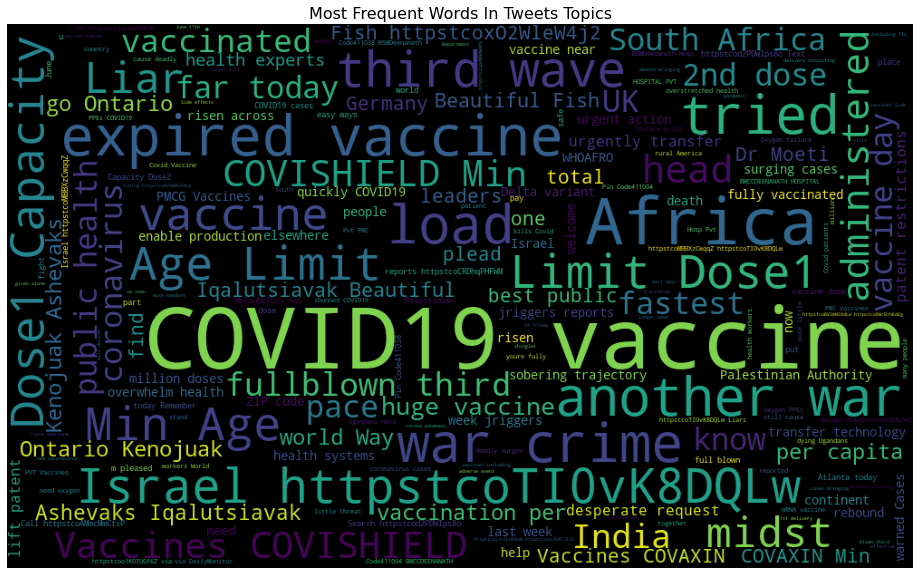

In [30]:
# Results of Cleaned_text processing
# print(corpus)
print(word_list[:2])
print(id2word)

# Ploting Occurence of Words

plt.figure(figsize=(20, 10))
plt.imshow(WordCloud(width=1000,height=600,stopwords=STOPWORDS).generate(' '.join(tweet_df.cleaned_text .values)))
plt.axis('off')
plt.title('Most Frequent Words In Tweets Topics',fontsize=16)
plt.show()

## Topic Modeling Using Natural Language Processing

### Model Used: Latent Dirichlet Allocation

According to distributional hypothesis, (i.e. similar topics make use of similar words) and the statistical mixture hypothesis (i.e. documents talk about several topics) for which a statistical distribution can be determined. 

--> The purpose of LDA is mapping each teweets in our corpus to a set of topics which covers a good deal of the words in the tweet

In [31]:
# Importing Necessary packages
import gensim
from gensim.models import CoherenceModel
from gensim import corpora
from pprint import pprint
import re

In [32]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [33]:
# Showing Topics
pprint(lda_model.show_topics(formatted=False))

[(0,
  [('to', 0.06250651),
   ('vaccines', 0.041454997),
   ('your', 0.038936835),
   ('You', 0.03617932),
   ('by', 0.03172894),
   ('Israel', 0.030369507),
   ('another', 0.03030093),
   ('Just', 0.029972116),
   ('off', 0.029604534),
   ('expired', 0.029340552)]),
 (1,
  [('in', 0.037388824),
   ('the', 0.031526282),
   ('are', 0.025956826),
   ('of', 0.023784036),
   ('Ontario', 0.021045938),
   ('to', 0.019901251),
   ('is', 0.01893636),
   ('COVID19', 0.01854654),
   ('so', 0.016872922),
   ('vaccines', 0.015793987)]),
 (2,
  [('Vaccines', 0.045011364),
   ('Limit', 0.04213157),
   ('Age', 0.04213157),
   ('Pin', 0.04213157),
   ('Min', 0.04213157),
   ('Dose1', 0.04213157),
   ('Capacity', 0.041046225),
   ('COVAXIN', 0.031441543),
   ('0', 0.02274566),
   ('PMCG', 0.022716226)]),
 (3,
  [('the', 0.023653142),
   ('to', 0.021482985),
   ('vaccines', 0.020864626),
   ('COVID19', 0.019588707),
   ('are', 0.017353496),
   ('and', 0.016614778),
   ('people', 0.013906619),
   ('of',

* Each line is a topic with individual topic terms and weights. Topic1 (Indexed 0 above)  can be termed as Israel's Covid19 Vaccines, Topic3 (indexed 2 above) can be termed as Covid19 Vaccines known as "Covaxin" and it's vaccination dosage considering age, and its capacity and Topic4 (indexed 3 above) can be termed as Covid19 Vaccines.

# **Tweet Topic Model Analysis**

Perplexity is also a measure of model quality and in natural language processing is often used as “perplexity per number of words”. It describes how well a model predicts a sample, i.e. how much it is “perplexed” by a sample from the observed data. The lower the score, the better the model for the given data.

A coherence matrix is used to test the model for accuracy. Topic coherence is a measure that compares different topic models based on their human-interpretability. The coherence score ‘C_V’ provides a numerical value to the interpretability of the topics

In [34]:
# Compute Perplexity

#It's a measure of how good the model is. The lower the better. Perplexity is a negative value
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  
doc_lda = lda_model[corpus]


# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=word_list, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\n Ldamodel Coherence Score/Accuracy on Tweets Topic Modeling: ', coherence_lda)


Perplexity:  -6.680819232805183

 Ldamodel Coherence Score/Accuracy on Tweets Topic Modeling:  0.6363539683106737


* > Basic Ldamodel Coherence Score 0.6363, This means that the model has performed reasonably well in Tweet topic modeling.

### Analyising How Topics relates to each Other using pyLDAvis Package
Anlayizing results Exploring the Intertopic Distance Plot, helps to learn about how topics relate to each other, including potential higher-level structure between groups of topics

In [35]:
# Importing pyLDAvis package

import pyLDAvis.gensim_models as gensimvis
import pickle 
import pyLDAvis
from IPython.core.display import HTML
# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
# LDAvis_prepared
pyLDAvis.display(LDAvis_prepared)


## Conclusion on Topic Modelling

On the Diagram above shows that Topic1 which can be described as "Israel's Covid19 Vaccines", Topic2 which can be described as "Covid19 Vaccines known as "Covaxin" and it's vaccination dosage considering age, and its capacity" and Topic3 that can be described as "Covid19 Vaccines", are related.

# Sentiment Analysis

In [39]:
### Preparing Data to Perform Sentiment Analysis

tweets_filtered = pd.DataFrame(columns=['clean_text','polarity'])

tweets_filtered['clean_text'] =  tweet_df['original_text'].to_list()
tweets_filtered['polarity'] = tweet_df['polarity'].to_list()

In [40]:
tweets_filtered.head()

,clean_text,polarity
0,"🚨Africa is ""in the midst of a full-blown third...",0.166667
1,"Dr Moeti is head of WHO in Africa, and one of ...",0.133333
2,Thank you @research2note for creating this ama...,0.316667
3,"Former Pfizer VP and Virologist, Dr. Michael Y...",0.086111
4,I think it’s important that we don’t sell COVA...,0.280000


In [41]:
tweets_filtered.dropna()
tweets_filtered[:100]

,clean_text,polarity
0,"🚨Africa is ""in the midst of a full-blown third...",0.166667
1,"Dr Moeti is head of WHO in Africa, and one of ...",0.133333
2,Thank you @research2note for creating this ama...,0.316667
3,"Former Pfizer VP and Virologist, Dr. Michael Y...",0.086111
4,I think it’s important that we don’t sell COVA...,0.280000
...,...,...
95,Covid19 vaccines reach the remotest places of ...,-0.050000
96,#Healthcare systems nationwide are taking acti...,0.186111
97,Please do your research first if you read or s...,0.316667
98,Excited to be racing at @roadamerica this week...,0.375000


In [42]:
def text_category(p):
    if p == 0:
        return "neutral"
    elif p > 0:
        
        return "positive"
    else:
        return "negative"

In [43]:
tweets_filtered['polarity']=pd.to_numeric(tweets_filtered['polarity'],errors='coerce')
tweets_filtered['score'] = tweets_filtered.polarity.apply(text_category)
    
tweets_filtered[:100]

,clean_text,polarity,score
0,"🚨Africa is ""in the midst of a full-blown third...",0.166667,positive
1,"Dr Moeti is head of WHO in Africa, and one of ...",0.133333,positive
2,Thank you @research2note for creating this ama...,0.316667,positive
3,"Former Pfizer VP and Virologist, Dr. Michael Y...",0.086111,positive
4,I think it’s important that we don’t sell COVA...,0.280000,positive
...,...,...,...
95,Covid19 vaccines reach the remotest places of ...,-0.050000,negative
96,#Healthcare systems nationwide are taking acti...,0.186111,positive
97,Please do your research first if you read or s...,0.316667,positive
98,Excited to be racing at @roadamerica this week...,0.375000,positive


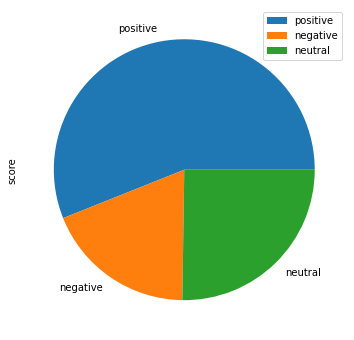

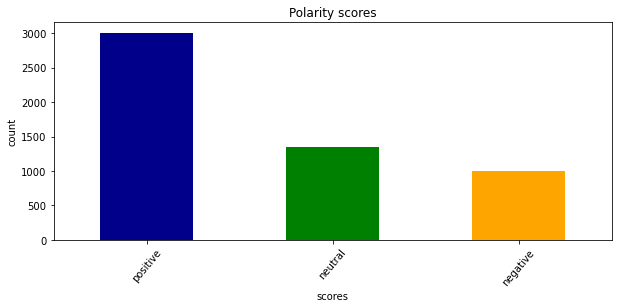

In [44]:
a,b,c = 0,0,0
for element in tweets_filtered.score:
    if element == 'positive':
        a +=1
    elif element == 'negative':
        b +=1
    else:
        c +=1
        
df = pd.DataFrame({'score': [a, b , c]},
                  index=['positive', 'negative', 'neutral'])
plot = df.plot.pie(y='score', figsize=(11, 6),subplots=True)

# tweets_filtered.hist(column='polarity')
#Bar chart
colors = ['darkblue', 'green','orange']

plt.figure(figsize=(10,4))
tweets_filtered['score'].value_counts().plot(kind='bar', rot = 50, color= colors)
plt.title('Polarity scores')
plt.xlabel('scores')
plt.ylabel('count');

In [45]:
# Deleting neutral scores
indices = tweets_filtered.loc[tweets_filtered['score']=='neutral'].index
tweets_filtered.drop(indices, inplace=True)
tweets_filtered=tweets_filtered.reset_index(drop=True)
tweets_filtered[:100]

,clean_text,polarity,score
0,"🚨Africa is ""in the midst of a full-blown third...",0.166667,positive
1,"Dr Moeti is head of WHO in Africa, and one of ...",0.133333,positive
2,Thank you @research2note for creating this ama...,0.316667,positive
3,"Former Pfizer VP and Virologist, Dr. Michael Y...",0.086111,positive
4,I think it’s important that we don’t sell COVA...,0.280000,positive
...,...,...,...
95,@IsraelMFA Israel is a brutal nazi-like entity...,-0.437500,negative
96,All UK adults are now eligible for their #Covi...,0.275000,positive
97,BioCubaFarma says phase 3 clinical trial resul...,-0.162500,negative
98,Some good news for Friday. Yesterday we had ou...,0.155556,positive


In [46]:
def score_to_logic(p):
    if p == "positive":
        return 1
    else:
        return 0

In [47]:
tweets_filtered['scoremap'] = tweets_filtered.score.apply(score_to_logic)
tweets_filtered[:100]

,clean_text,polarity,score,scoremap
0,"🚨Africa is ""in the midst of a full-blown third...",0.166667,positive,1
1,"Dr Moeti is head of WHO in Africa, and one of ...",0.133333,positive,1
2,Thank you @research2note for creating this ama...,0.316667,positive,1
3,"Former Pfizer VP and Virologist, Dr. Michael Y...",0.086111,positive,1
4,I think it’s important that we don’t sell COVA...,0.280000,positive,1
...,...,...,...,...
95,@IsraelMFA Israel is a brutal nazi-like entity...,-0.437500,negative,0
96,All UK adults are now eligible for their #Covi...,0.275000,positive,1
97,BioCubaFarma says phase 3 clinical trial resul...,-0.162500,negative,0
98,Some good news for Friday. Yesterday we had ou...,0.155556,positive,1


In [48]:
# Assigning Target variable and splitting the data
from sklearn.model_selection import train_test_split
X,y = tweets_filtered['clean_text'], tweets_filtered['scoremap']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=1)
X.head()

0    🚨Africa is "in the midst of a full-blown third...
1    Dr Moeti is head of WHO in Africa, and one of ...
2    Thank you @research2note for creating this ama...
3    Former Pfizer VP and Virologist, Dr. Michael Y...
4    I think it’s important that we don’t sell COVA...
Name: clean_text, dtype: object

In [49]:
# Vectorizing X_train, X_test
from sklearn.feature_extraction.text import CountVectorizer
count_v = CountVectorizer(ngram_range=(3, 3))
X_train_cv = count_v.fit_transform(X_train)
X_test_cv = count_v.transform(X_test)


In [50]:
# SGDC Classifier
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()
clf.fit(X_train_cv, y_train)
predictions = clf.predict(X_test_cv)

In [51]:
# Performance Analysis of the  metrics

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix,classification_report
results = confusion_matrix(y_test, predictions) 

print ('Accuracy :',accuracy_score(y_test, predictions)) 
print ('Results: ')
print (classification_report(y_test, predictions))

# End of Project

Accuracy : 0.9825653798256538
Results: 
              precision    recall  f1-score   support

           0       1.00      0.93      0.97       215
           1       0.98      1.00      0.99       588

    accuracy                           0.98       803
   macro avg       0.99      0.97      0.98       803
weighted avg       0.98      0.98      0.98       803

